# Linear Regression Analysis

Eeshan Gupta  
eeshangpt@gmail.com

# Table of Content
1. [Introduction to the problem](#Introduction-to-the-problem)
    1. [Business Understanding](#Business-Understanding)
2. [Reading and cleaning the data](#Reading-and-Cleaning-the-data)
    1. [Missing Values](#Missing-Data-Analysis)
    2. [Cleaning the data](#Cleaning-the-data)
3. [Exploratory Data Analysis and Data Preparation](#Exploartory-Data-Analysis-and-Data-Preparation)
    1. [Univariate Analysis](#)
    2. [Segmented Univariate Analysis](#)
    3. [Data Preparation](#)
    4. [Bivariate Analysis](#)
4. [Data Preparation for Model Training](#Data-Preparations-for-Model-Training)
    1. [Train Test Split](#Train-Test-Split)
    2. [Rescaling](#Rescaling)
5. [Model Training](#Model-Training)
    1. [Recursive Feature Elimination](#Recursive-Feature-Elimination)
    2. [Manual Elimination of Features](#Manual-elimination-of-features)
6. [Residual Analysis](#Residual-Analysis)
7. [Predictions and Evaluation on Test Data](#Predictions-and-Evaluation-on-Test-Data)
8. [Subjective Questions](#Subjective-Questions)

## Introduction to the problem
### Business Understanding
- A US-based bike sharing provider **Boom Bikes**, provides bikes on sharing basis.
- They have seen a dip in revenues due to the ongoing Corona Pandemic.
- They want to understand the demands of the market when the quarantine situation ends allowing them an edge over the competitors

**Business Goal**:
- model the demand with the available independent variables
- the client wants to understand how exactly the demands vary with different features
- to manipulate the business strategy to meet the demands
- understand the new business dynamics

### We intend to 
- understand the factors on which the demands for these shared bikes depends in the American Market
- know:
    - Which variables are significant in predicting the demand for shared bikes
    - How well those varibles describe the bikes demand

Imports and standard settings

In [1]:
import warnings
from os import getcwd
from os.path import join

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
np.random.seed(0)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)
sns.set_style('darkgrid')

In [3]:
PRJ_DIR = getcwd()
DATA_DIR = join(PRJ_DIR, "data")

## Reading and Cleaning the data

In [4]:
data = pd.read_csv(join(DATA_DIR, "day.csv"))
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
with open(join(DATA_DIR, "Readme.txt"), 'r') as f:
    data_dictonary = f.readlines()
del f
print("".join(data_dictonary[:25]))

Dataset characteristics
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered



### Missing Data Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
data.isna().sum(axis=0)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

The data has **NO** missing values in the provided data 

In [8]:
data.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

The variable `instant` and `dteday` acts as indentifiers for the data. Rest all the columns neither have missing values nor have only one value for all the observstions. 

### Cleaning the data

In [9]:
data['dteday'] = pd.to_datetime(data.dteday, format='%d-%m-%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

Creating a copy of original data as a backup

In [10]:
data_bk = data.copy()

## Exploartory Data Analysis and Data Preparation

Creating columns types.

In [11]:
target_columns = ["cnt"]

numerical_columns = ["temp",
                     "atemp",
                     "hum",
                     "windspeed",]

categorical_columns =["season",
                      "yr",
                      "mnth",
                      "holiday",
                      "weekday",
                      "workingday",
                      "weathersit",]

In [12]:
data.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018-12-31 12:00:00,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
min,1.000000,2018-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2018-07-02 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,2018-12-31 12:00:00,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,2019-07-01 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,2019-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647


In [13]:
data[categorical_columns].sample(15)

,season,yr,mnth,holiday,weekday,workingday,weathersit
196,3,0,7,0,6,0,1
187,3,0,7,0,4,1,1
14,1,0,1,0,6,0,2
31,1,0,2,0,2,1,2
390,1,1,1,0,4,1,2
319,4,0,11,0,3,1,3
299,4,0,10,0,4,1,2
702,4,1,12,0,2,1,1
462,2,1,4,0,0,0,1
27,1,0,1,0,5,1,2


### Univariate Analysis

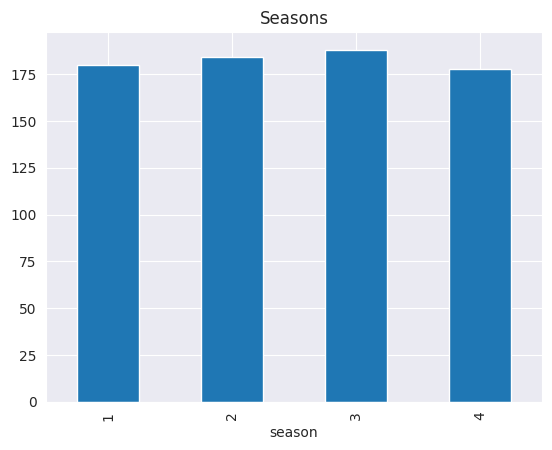

In [14]:
plt.figure()
data.season.value_counts().sort_index().plot(kind='bar')
plt.title('Seasons')
plt.show()

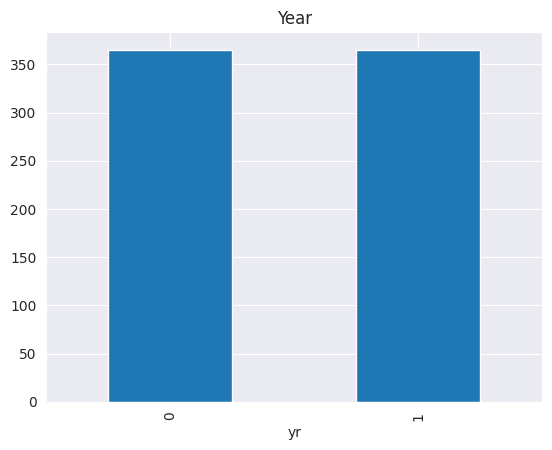

In [15]:
plt.figure()
data.yr.value_counts().sort_index().plot(kind='bar')
plt.title('Year')
plt.show()

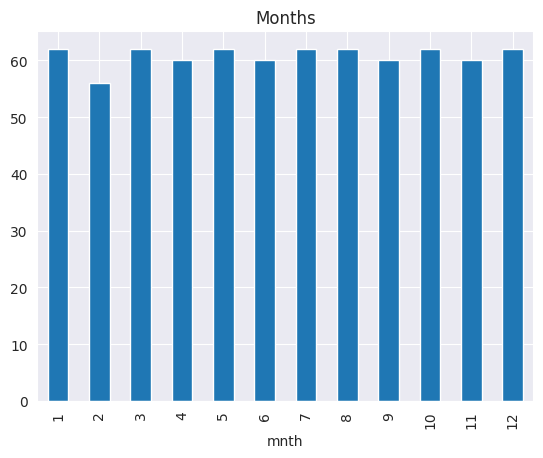

In [16]:
plt.figure()
data.mnth.value_counts().sort_index().plot(kind='bar')
plt.title('Months')
plt.show()

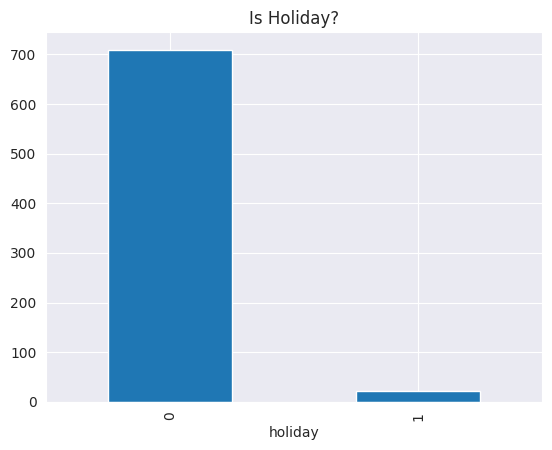

In [17]:
plt.figure()
data.holiday.value_counts().sort_index().plot(kind='bar')
plt.title('Is Holiday?')
plt.show()

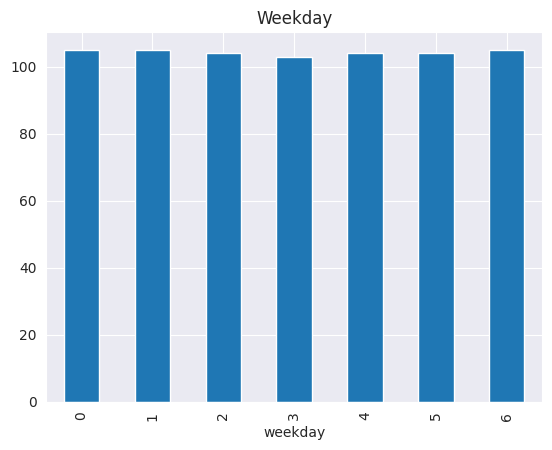

In [18]:
plt.figure()
data.weekday.value_counts().sort_index().plot(kind='bar')
plt.title('Weekday')
plt.show()

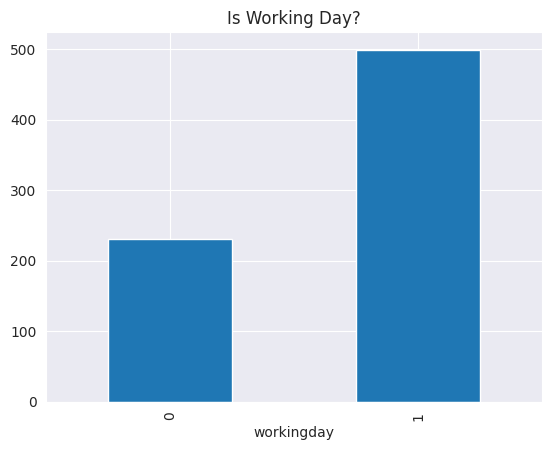

In [19]:
plt.figure()
data.workingday.value_counts().sort_index().plot(kind='bar')
plt.title('Is Working Day?')
plt.show()

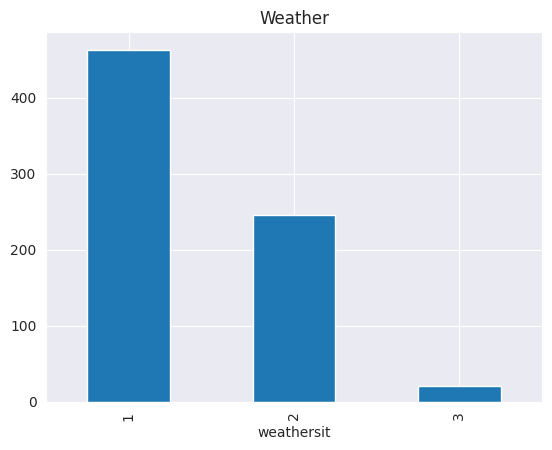

In [20]:
plt.figure()
data.weathersit.value_counts().sort_index().plot(kind='bar')
plt.title('Weather')
plt.show()

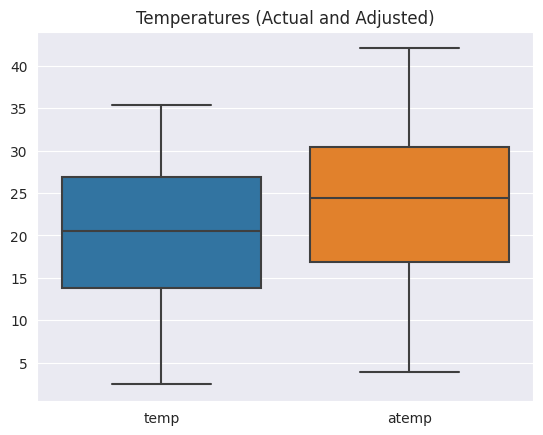

In [21]:
plt.figure()
sns.boxplot(data[['temp', 'atemp']]) #, 'hum', 'windspeed',]])
plt.title('Temperatures (Actual and Adjusted)')
plt.show()

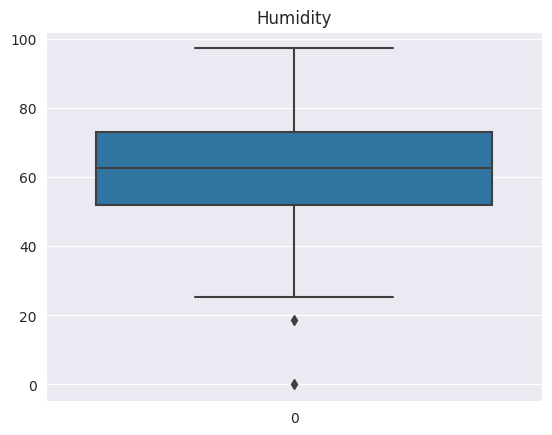

In [22]:
plt.figure()
sns.boxplot(data.hum)
plt.title('Humidity')
plt.show()

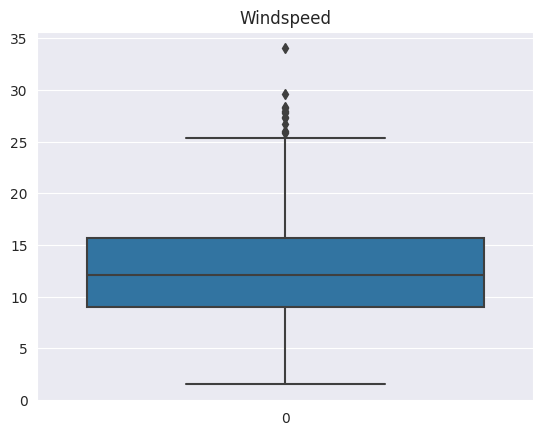

In [23]:
plt.figure()
sns.boxplot(data.windspeed)
plt.title('Windspeed')
plt.show()

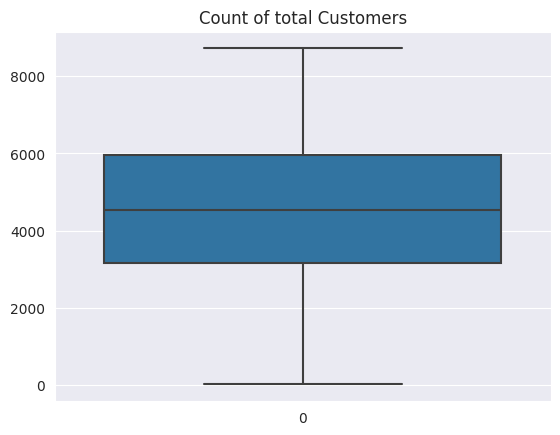

In [24]:
plt.figure()
sns.boxplot(data.cnt)
plt.title("Count of total Customers")
plt.show()

### Segmented-univariate Analysis

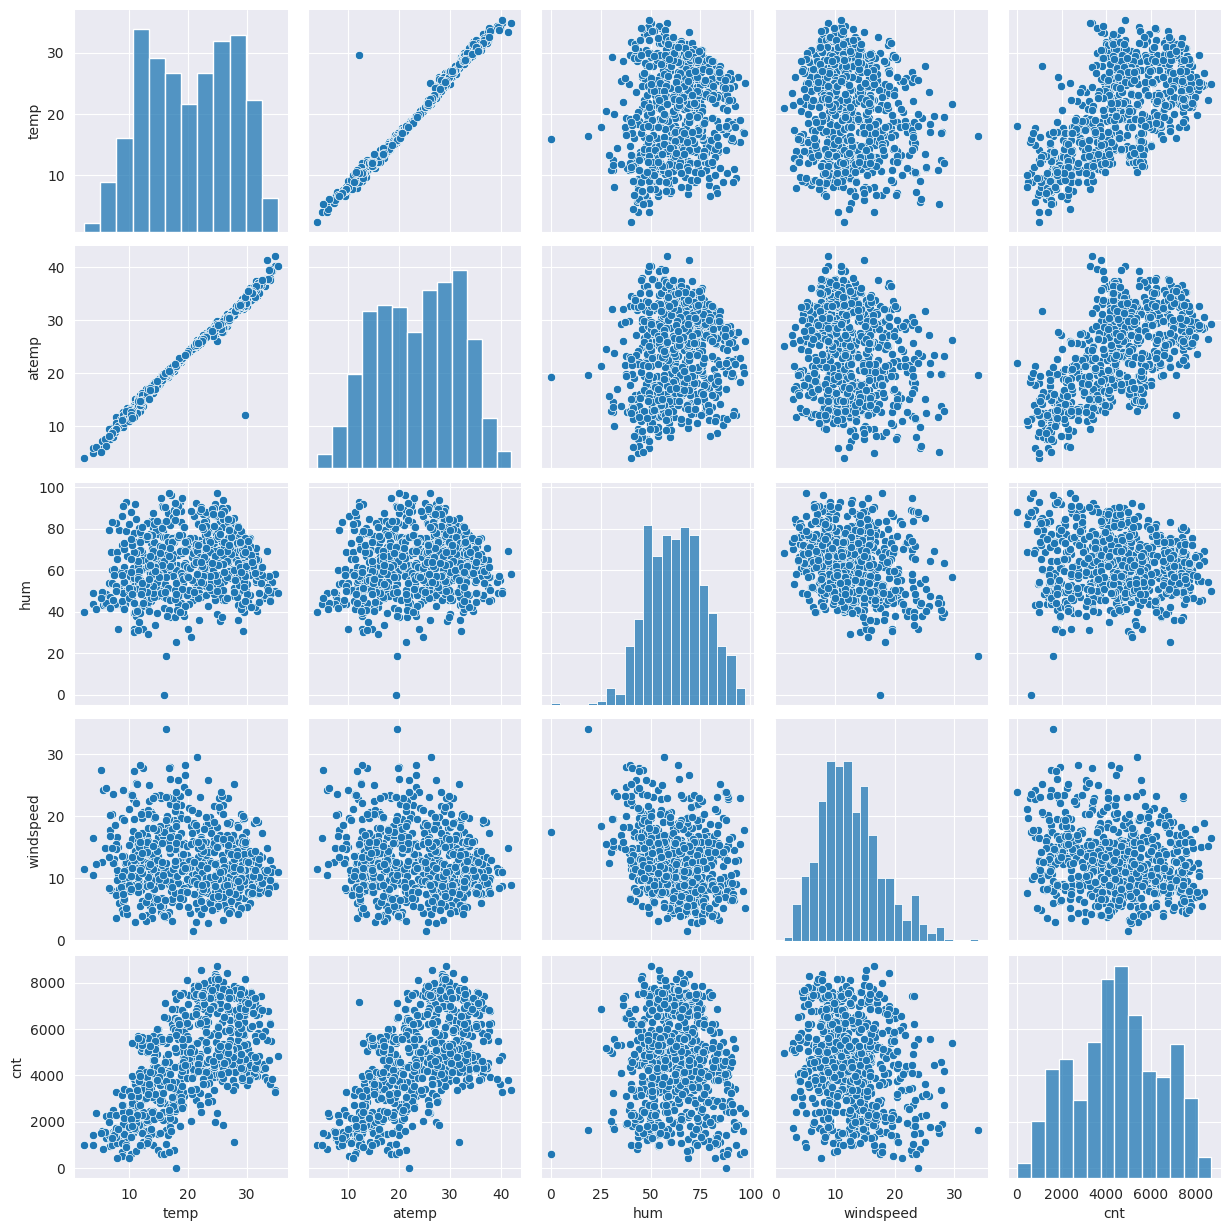

In [25]:
sns.pairplot(data[numerical_columns + target_columns])
plt.show()

We can infer that 

In [26]:
categorical_columns = [i for i in data_bk.columns 
                       if i not in numerical_columns + target_columns + ['instant', 'dteday', 'casual', 'registered']]
categorical_columns

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [27]:
(data.cnt < 0).sum()

0

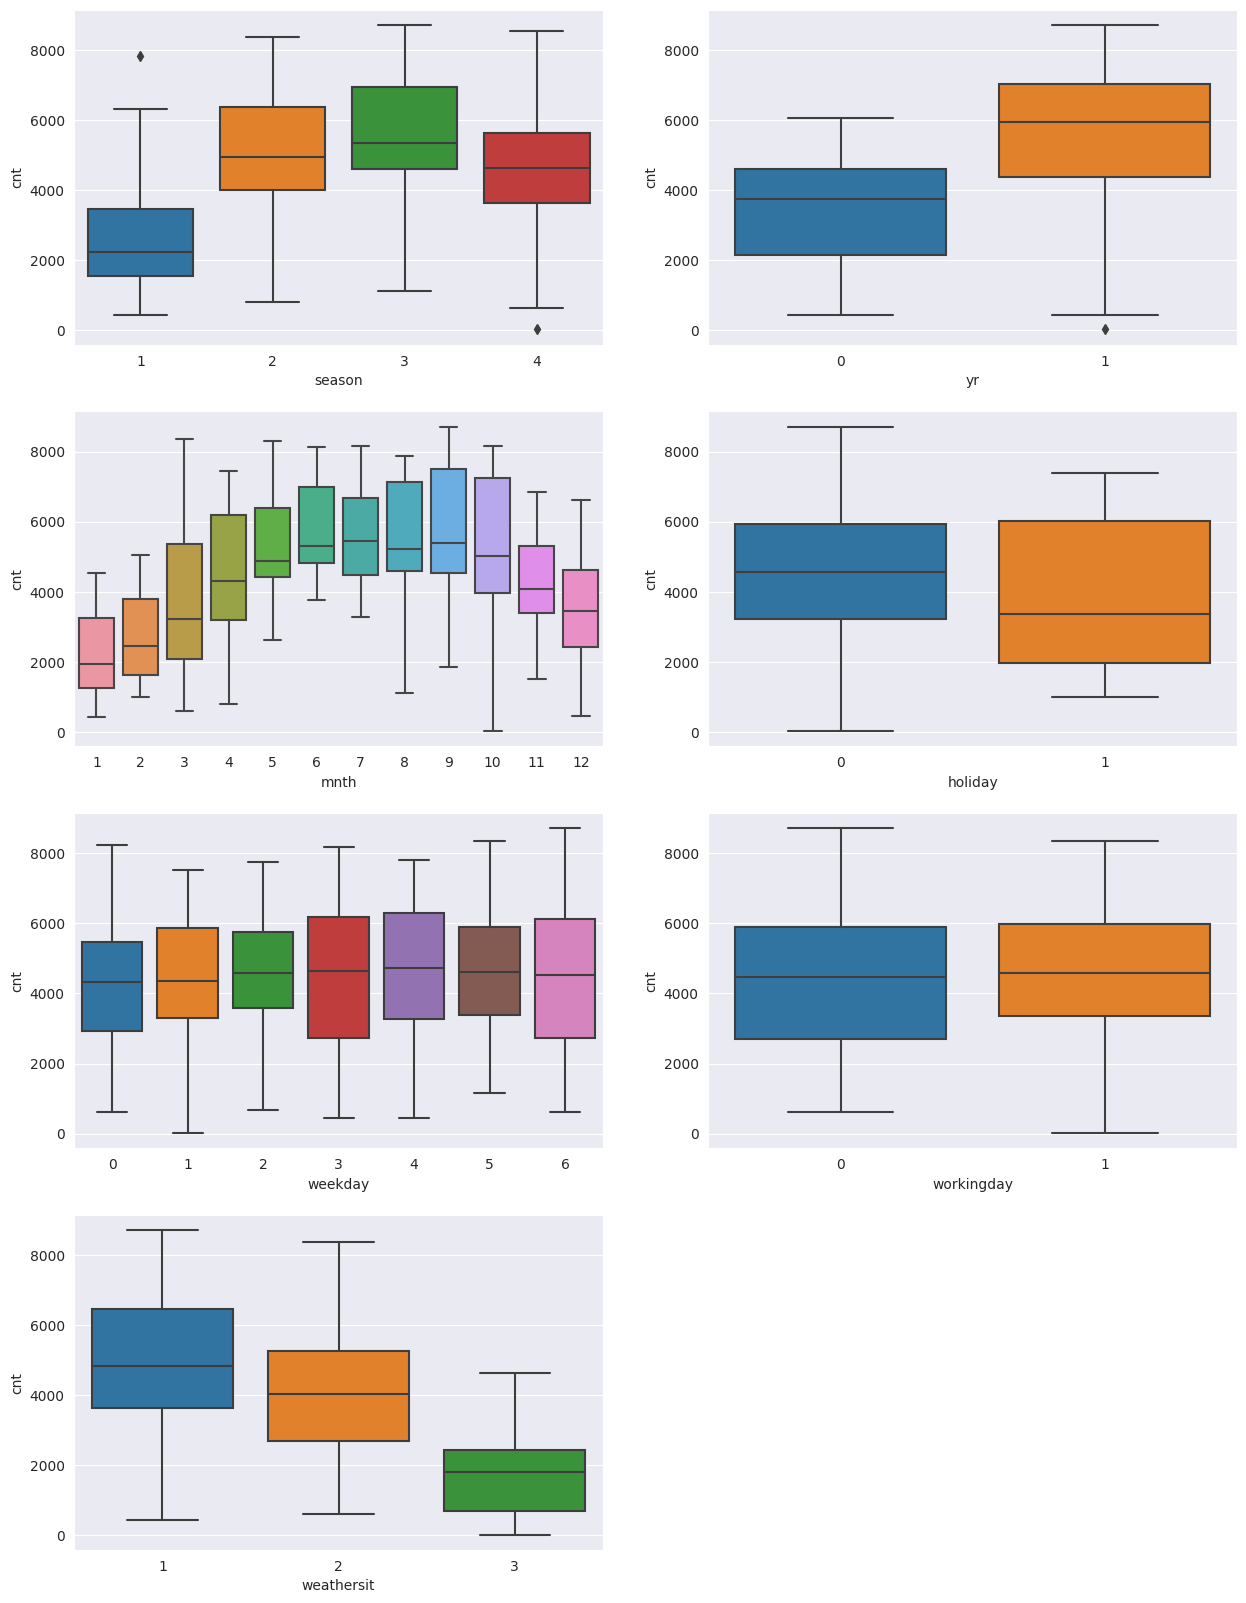

In [28]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_columns):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=data, x=col, y='cnt')

### Data Preparation

In [29]:
categorical_col_gt_2_unique_values = [i for i in categorical_columns if data[i].nunique() > 2]
dummy_col_df = pd.DataFrame()
for i in categorical_col_gt_2_unique_values:
    a = pd.get_dummies(data[i],prefix=f'{i}', prefix_sep='_', drop_first=True).astype(int)
    dummy_col_df = pd.concat([dummy_col_df, a], axis=1)
    del a

In [30]:
data = pd.concat([data, dummy_col_df], axis=1)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [31]:
columns_to_dropped = list(set(categorical_col_gt_2_unique_values).intersection(set(categorical_columns)))
del categorical_col_gt_2_unique_values, categorical_columns, dummy_col_df

In [32]:
data = data.drop(columns_to_dropped + ['dteday', 'instant', 'casual', 'registered'], axis=1)

In [33]:
data.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,1,8.378268,11.66045,51.8261,6.000868,1606,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,0,0,1,8.057402,10.44195,49.8696,11.304642,1510,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7,0,0,0,6.765000,8.11270,53.5833,17.875868,959,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [34]:
predictor_columns = [col for col in data.columns if col not in target_columns]

### Bivariate Analysis

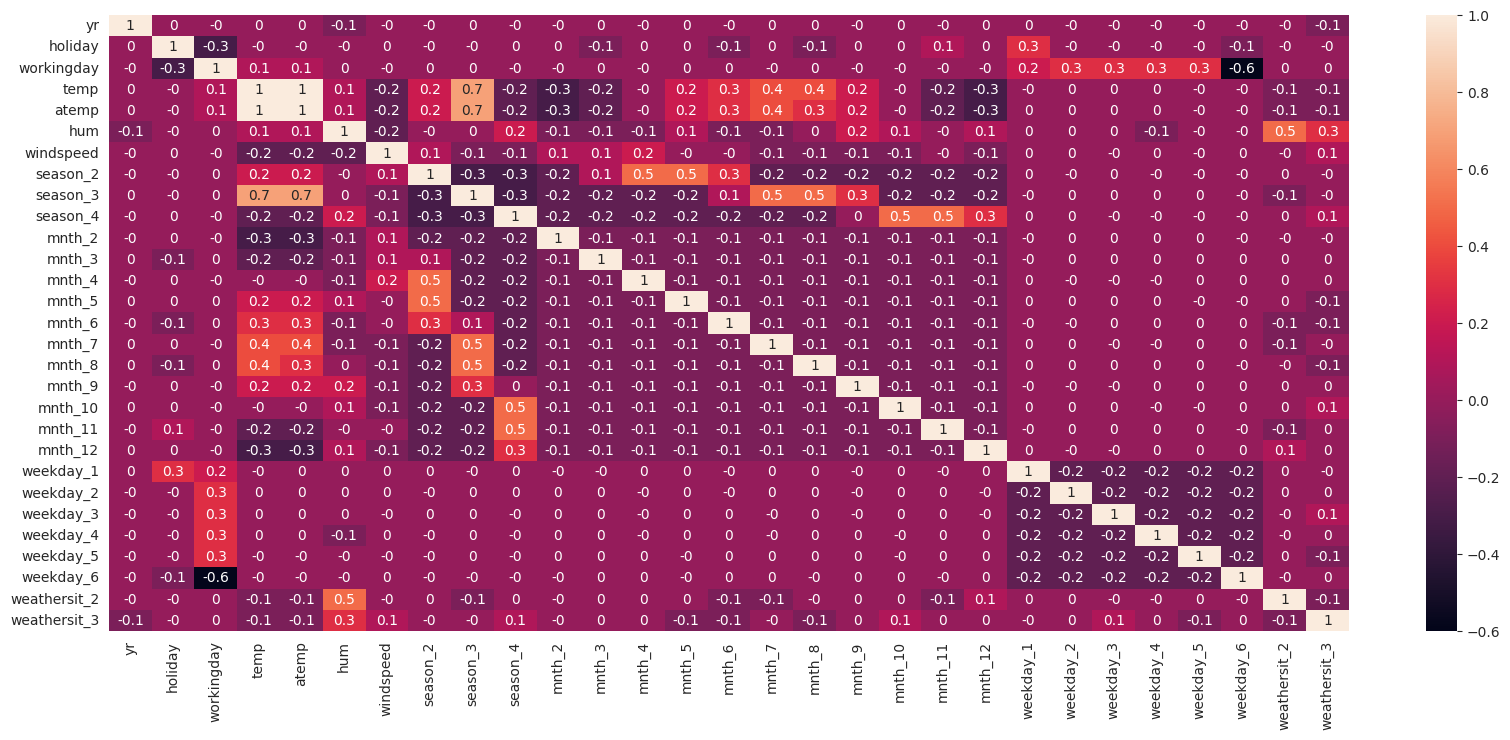

In [35]:
plt.figure(figsize=(20, 8))
sns.heatmap(data[[i for i in data.columns 
                  if i not in target_columns]].corr().round(1), annot=True)
plt.show()

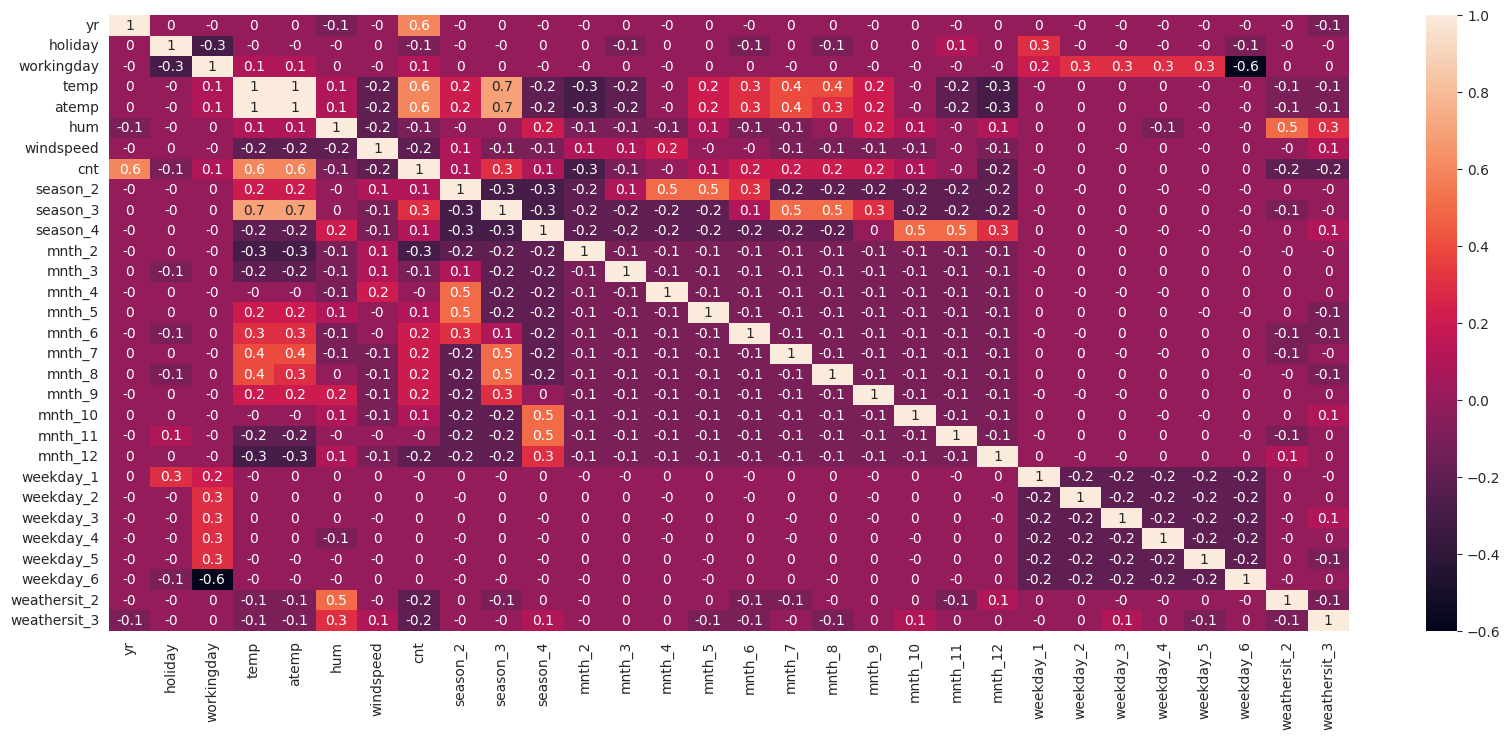

In [71]:
plt.figure(figsize=(20, 8))
sns.heatmap(data[[i for i in data.columns]].corr().round(1), annot=True)
plt.show()

**EDA Summary**
- There seems to be a slightly more number of observations for seasons `fall (3)` followed by `summer (2)`
- Weather seems to `1: Clear, Few clouds, Partly cloudy, Partly cloudy` most of the times  
        - It also implies that more customer used the service on a clear day  
- The Feeling temperature `atemp` is generally higher than the actual temperature `temp`
        - There is a linear relation between them
- Median number of customers are higher in the `fall (3)` season followed by `summer (2)` and then `winter (4)`. `Sprin
g (1)` has the lowest amount of customers 
- The number of customers increased in 2019 as compared to 2018     
- Customer used the service more on a day which was not a `holiday`, although this is not true for weekends `weekday (0)`

## Data Preparations for Model Training

### Train Test Split

In [36]:
data_train, data_test = train_test_split(data, train_size=0.7, random_state=0)

In [37]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 524 to 684
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    int64  
 9   season_3      510 non-null    int64  
 10  season_4      510 non-null    int64  
 11  mnth_2        510 non-null    int64  
 12  mnth_3        510 non-null    int64  
 13  mnth_4        510 non-null    int64  
 14  mnth_5        510 non-null    int64  
 15  mnth_6        510 non-null    int64  
 16  mnth_7        510 non-null    int64  
 17  mnth_8        510 non-null    int64  
 18  mnth_9        510 non-null    int

In [38]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 196 to 235
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   cnt           220 non-null    int64  
 8   season_2      220 non-null    int64  
 9   season_3      220 non-null    int64  
 10  season_4      220 non-null    int64  
 11  mnth_2        220 non-null    int64  
 12  mnth_3        220 non-null    int64  
 13  mnth_4        220 non-null    int64  
 14  mnth_5        220 non-null    int64  
 15  mnth_6        220 non-null    int64  
 16  mnth_7        220 non-null    int64  
 17  mnth_8        220 non-null    int64  
 18  mnth_9        220 non-null    int

### Rescaling

In [39]:
min_max_scalar = MinMaxScaler()

In [40]:
data_train[numerical_columns + target_columns] = min_max_scalar.fit_transform(data_train[numerical_columns + target_columns])
data_train[numerical_columns + target_columns].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.514246,0.510028,0.514303,0.373352,0.514084
std,0.242926,0.227571,0.194712,0.192759,0.217119
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.301603,0.311891,0.361513,0.232054,0.365221
50%,0.499006,0.512335,0.513631,0.352763,0.521859
75%,0.732894,0.704135,0.651342,0.482854,0.670156
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
data_test[numerical_columns + target_columns] = min_max_scalar.transform(data_test[numerical_columns + target_columns])
data_test[numerical_columns + target_columns].describe()

,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.538518,0.531124,0.532982,0.366151,0.520799
std,0.230286,0.215465,0.205931,0.197966,0.235684
min,-0.048868,-0.027173,-0.353829,-0.049874,0.067073
25%,0.360687,0.371366,0.387181,0.227015,0.355442
50%,0.565441,0.568312,0.527552,0.327069,0.520191
75%,0.722547,0.695249,0.678244,0.465036,0.722964
max,0.982573,1.019965,0.986079,1.165056,0.981707


In [42]:
train_y = data_train.pop('cnt')
train_X = data_train

In [43]:
test_y = data_test.pop('cnt')
test_X = data_test

## Model Training

### Recursive Feature Elimination

Total number of features in the data are **30**. I am choosing to eliminate **50%** of the feature and moving ahead with **15** features.

In [44]:
lr_model = LinearRegression()
lr_model.fit(train_X, train_y)

rfe = RFE(lr_model, n_features_to_select=15)
rfe.fit(train_X, train_y)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [45]:
pd.DataFrame(
    list(zip(train_X.columns, rfe.support_, rfe.ranking_)),
    columns=['Feature', 'Selected?', 'Rank']).sort_values(by=['Rank', 'Feature']).reset_index(drop=True)

,Feature,Selected?,Rank
0,atemp,True,1
1,holiday,True,1
2,hum,True,1
3,mnth_9,True,1
4,season_2,True,1
5,season_4,True,1
6,weathersit_3,True,1
7,weekday_1,True,1
8,weekday_2,True,1
9,weekday_3,True,1


Selected Features after RFE

In [46]:
selected_columns = train_X.columns[rfe.support_]
pd.Series(selected_columns.to_list())

0               yr
1          holiday
2       workingday
3            atemp
4              hum
5        windspeed
6         season_2
7         season_4
8           mnth_9
9        weekday_1
10       weekday_2
11       weekday_3
12       weekday_4
13       weekday_5
14    weathersit_3
dtype: object

Dropped Features after RFE

In [47]:
dropped_columns = train_X.columns[~rfe.support_]
pd.Series(dropped_columns.to_list())

0             temp
1         season_3
2           mnth_2
3           mnth_3
4           mnth_4
5           mnth_5
6           mnth_6
7           mnth_7
8           mnth_8
9          mnth_10
10         mnth_11
11         mnth_12
12       weekday_6
13    weathersit_2
dtype: object

Filtering the selected columns

In [48]:
train_X_rfe = train_X[selected_columns]

### Manual Elimination of Features

#### Step 1

In [49]:
train_X_rfe = sm.add_constant(train_X_rfe)
train_X_rfe.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,season_2,season_4,mnth_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weathersit_3
524,1.0,1,0,0,0.755332,0.254640,0.255430,1,0,0,0,0,0,0,0,0
12,1.0,0,0,1,0.071535,0.301044,0.647940,0,0,0,0,0,0,1,0,0
161,1.0,0,0,0,0.796115,0.557424,0.281887,1,0,0,0,0,0,0,0,0
556,1.0,1,0,1,0.757949,0.527842,0.274080,0,0,0,0,0,1,0,0,0
502,1.0,1,0,1,0.621666,0.374709,0.236721,1,0,0,0,0,0,0,1,0


In [50]:
lr_sm_model = sm.OLS(train_y, train_X_rfe).fit()
lr_sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     151.9
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          7.00e-169
Time:                        19:41:26   Log-Likelihood:                 480.78
No. Observations:                 510   AIC:                            -931.6
Df Residuals:                     495   BIC:                            -868.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1951      0.022      8.772      0.000       0.151       0.239
yr               0.2159      0.009     25.089      0.000       0.199       0.233
holiday         -0.0472      0.023     -2.086      0.037      -0.092      -0.003
workingday       0.0132      0.008      1.615      0.107      -0.003       0.029
atemp            0.6013      0.020     29.403      0.000       0.561       0.641
hum             -0.2100      0.025     -8.332      0.000      -0.260      -0.161
windspeed       -0.1268      0.024     -5.310      0.000      -0.174      -0.080
season_2         0.0809      0.011      7.553      0.000       0.060       0.102
season_4         0.1273      0.011     11.418      0.000       0.105       0.149
mnth_9           0.1088      0.017      6.371      0.000       0.075       0.142
weekday_1       -0.0193      0.010     -1.854      0.064      -0.040       0.001
weekday_2       -0.0128      0.011     -1.131      0.259      -0.035       0.009
weekday_3       -0.0012      0.011     -0.107      0.915      -0.023       0.020
weekday_4       -0.0032      0.011     -0.285      0.775      -0.025       0.019
weekday_5        0.0024      0.011      0.211      0.833      -0.020       0.025
weathersit_3    -0.1470      0.031     -4.794      0.000      -0.207      -0.087
==============================================================================
Omnibus:                       62.405   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.740
Skew:                          -0.734   Prob(JB):                     1.21e-25
Kurtosis:                       4.802   Cond. No.                     7.22e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.67e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
temp_X = train_X_rfe.drop('const', axis=1)
pd.DataFrame([
    (i, round(variance_inflation_factor(temp_X.values, itr), 2)) 
    for itr, i in enumerate(temp_X.columns)],
             columns=['Features', 'VIF']).sort_values(by=['VIF'], ascending=False)

,Features,VIF
1,holiday,inf
2,workingday,inf
9,weekday_1,inf
10,weekday_2,inf
11,weekday_3,inf
12,weekday_4,inf
13,weekday_5,inf
4,hum,6.97
3,atemp,5.88
5,windspeed,3.34


#### Step 2
Since we are getting very high values of VIF ($\infty$), I am choosing to eliminate 2 variables `weekday_3`, & `weekday_5` based on P-values which are $0.915$ & $0.833$ respectively

In [52]:
train_X_rfe = train_X_rfe.drop(['weekday_3', 'weekday_5'], axis=1)

In [53]:
lr_sm_model = sm.OLS(train_y, train_X_rfe).fit()
lr_sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     163.8
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          5.50e-170
Time:                        19:41:26   Log-Likelihood:                 480.76
No. Observations:                 510   AIC:                            -933.5
Df Residuals:                     496   BIC:                            -874.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1953      0.022      8.796      0.000       0.152       0.239
yr               0.2159      0.009     25.114      0.000       0.199       0.233
holiday         -0.0466      0.028     -1.669      0.096      -0.101       0.008
workingday       0.0137      0.011      1.211      0.226      -0.009       0.036
atemp            0.6013      0.020     29.431      0.000       0.561       0.641
hum             -0.2103      0.025     -8.365      0.000      -0.260      -0.161
windspeed       -0.1269      0.024     -5.319      0.000      -0.174      -0.080
season_2         0.0810      0.011      7.570      0.000       0.060       0.102
season_4         0.1274      0.011     11.443      0.000       0.106       0.149
mnth_9           0.1089      0.017      6.392      0.000       0.075       0.142
weekday_1       -0.0198      0.014     -1.412      0.159      -0.047       0.008
weekday_2       -0.0133      0.014     -0.968      0.333      -0.040       0.014
weekday_4       -0.0037      0.014     -0.268      0.789      -0.031       0.023
weathersit_3    -0.1476      0.031     -4.839      0.000      -0.208      -0.088
==============================================================================
Omnibus:                       61.880   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.357
Skew:                          -0.730   Prob(JB):                     2.43e-25
Kurtosis:                       4.790   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
temp_X = train_X_rfe.drop('const', axis=1)
pd.DataFrame([
    (i, round(variance_inflation_factor(temp_X.values, itr), 2)) 
    for itr, i in enumerate(temp_X.columns)],
             columns=['Features', 'VIF']).sort_values(by=['VIF'], ascending=False)

,Features,VIF
4,hum,6.95
3,atemp,5.88
2,workingday,4.49
5,windspeed,3.34
0,yr,1.95
6,season_2,1.65
7,season_4,1.60
9,weekday_1,1.59
10,weekday_2,1.51
11,weekday_4,1.50


#### Step 3

Although the VIF values are high ($\gt 5$) for `hum` and `atemp`, but their P-values are $0$. Instead I am choosing to drop a variable with very high P-value or about which the model is not sure about. In this case it is `weekday_4` with P-value $0.789$

In [55]:
train_X_rfe = train_X_rfe.drop('weekday_4', axis=1)

In [56]:
lr_sm_model = sm.OLS(train_y, train_X_rfe).fit()
lr_sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     177.8
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          4.18e-171
Time:                        19:41:26   Log-Likelihood:                 480.72
No. Observations:                 510   AIC:                            -935.4
Df Residuals:                     497   BIC:                            -880.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1953      0.022      8.803      0.000       0.152       0.239
yr               0.2159      0.009     25.140      0.000       0.199       0.233
holiday         -0.0479      0.027     -1.745      0.082      -0.102       0.006
workingday       0.0125      0.010      1.205      0.229      -0.008       0.033
atemp            0.6012      0.020     29.458      0.000       0.561       0.641
hum             -0.2101      0.025     -8.369      0.000      -0.259      -0.161
windspeed       -0.1271      0.024     -5.336      0.000      -0.174      -0.080
season_2         0.0810      0.011      7.577      0.000       0.060       0.102
season_4         0.1275      0.011     11.479      0.000       0.106       0.149
mnth_9           0.1089      0.017      6.395      0.000       0.075       0.142
weekday_1       -0.0185      0.013     -1.403      0.161      -0.045       0.007
weekday_2       -0.0121      0.013     -0.933      0.351      -0.038       0.013
weathersit_3    -0.1474      0.030     -4.838      0.000      -0.207      -0.088
==============================================================================
Omnibus:                       62.076   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.032
Skew:                          -0.731   Prob(JB):                     1.73e-25
Kurtosis:                       4.797   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
temp_X = train_X_rfe.drop('const', axis=1)
pd.DataFrame([
    (i, round(variance_inflation_factor(temp_X.values, itr), 2)) 
    for itr, i in enumerate(temp_X.columns)],
             columns=['Features', 'VIF']).sort_values(by=['VIF'], ascending=False)

,Features,VIF
4,hum,6.95
3,atemp,5.88
2,workingday,3.70
5,windspeed,3.33
0,yr,1.95
6,season_2,1.65
7,season_4,1.60
9,weekday_1,1.42
10,weekday_2,1.34
8,mnth_9,1.22


#### Step 4

Again we observe that `hum` and `atemp` have a high VIF ($\gt 5$) but $0$ P-Value. Again I am choosing to drop a variable with very high P-value (or about which the model is not sure about). In this case it is `weekday_2` with P-value $0.351$

In [58]:
train_X_rfe = train_X_rfe.drop(['weekday_2'], axis=1)

In [59]:
lr_sm_model = sm.OLS(train_y, train_X_rfe).fit()
lr_sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     194.0
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          4.52e-172
Time:                        19:42:44   Log-Likelihood:                 480.28
No. Observations:                 510   AIC:                            -936.6
Df Residuals:                     498   BIC:                            -885.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1963      0.022      8.860      0.000       0.153       0.240
yr               0.2161      0.009     25.172      0.000       0.199       0.233
holiday         -0.0499      0.027     -1.823      0.069      -0.104       0.004
workingday       0.0094      0.010      0.961      0.337      -0.010       0.029
atemp            0.6001      0.020     29.456      0.000       0.560       0.640
hum             -0.2109      0.025     -8.404      0.000      -0.260      -0.162
windspeed       -0.1281      0.024     -5.385      0.000      -0.175      -0.081
season_2         0.0816      0.011      7.639      0.000       0.061       0.103
season_4         0.1277      0.011     11.493      0.000       0.106       0.150
mnth_9           0.1094      0.017      6.431      0.000       0.076       0.143
weekday_1       -0.0156      0.013     -1.217      0.224      -0.041       0.010
weathersit_3    -0.1477      0.030     -4.850      0.000      -0.208      -0.088
==============================================================================
Omnibus:                       61.181   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.351
Skew:                          -0.722   Prob(JB):                     4.01e-25
Kurtosis:                       4.790   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
temp_X = train_X_rfe.drop('const', axis=1)
pd.DataFrame([
    (i, round(variance_inflation_factor(temp_X.values, itr), 2)) 
    for itr, i in enumerate(temp_X.columns)],
             columns=['Features', 'VIF']).sort_values(by='VIF', ascending=False).reset_index(drop=True)

,Features,VIF
0,hum,6.95
1,atemp,5.87
2,workingday,3.33
3,windspeed,3.33
4,yr,1.94
5,season_2,1.65
6,season_4,1.59
7,weekday_1,1.34
8,mnth_9,1.22
9,holiday,1.21


#### Step 5

Again we observe that `hum` and `atemp` have a high VIF ($\gt 5$) but $0$ P-Value. Again I am choosing to drop a variable with very high P-value (or about which the model is not sure about). In this case it is `workingday` with P-value $0.337$

In [55]:
train_X_rfe = train_X_rfe.drop(['workingday'], axis=1)

In [56]:
lr_sm_model = sm.OLS(train_y, train_X_rfe).fit()
lr_sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     213.3
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          4.77e-173
Time:                        13:21:23   Log-Likelihood:                 479.80
No. Observations:                 510   AIC:                            -937.6
Df Residuals:                     499   BIC:                            -891.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2032      0.021      9.694      0.000       0.162       0.244
yr               0.2162      0.009     25.191      0.000       0.199       0.233
holiday         -0.0581      0.026     -2.235      0.026      -0.109      -0.007
atemp            0.6007      0.020     29.501      0.000       0.561       0.641
hum             -0.2123      0.025     -8.478      0.000      -0.262      -0.163
windspeed       -0.1289      0.024     -5.423      0.000      -0.176      -0.082
season_2         0.0820      0.011      7.685      0.000       0.061       0.103
season_4         0.1276      0.011     11.485      0.000       0.106       0.149
mnth_9           0.1092      0.017      6.418      0.000       0.076       0.143
weekday_1       -0.0127      0.012     -1.018      0.309      -0.037       0.012
weathersit_3    -0.1450      0.030     -4.781      0.000      -0.205      -0.085
==============================================================================
Omnibus:                       62.842   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.016
Skew:                          -0.743   Prob(JB):                     1.74e-25
Kurtosis:                       4.777   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
temp_X = train_X_rfe.drop('const', axis=1)
pd.DataFrame([
    (i, round(variance_inflation_factor(temp_X.values, itr), 2)) 
    for itr, i in enumerate(temp_X.columns)],
             columns=['Features', 'VIF']).sort_values(by='VIF', ascending=False)

,Features,VIF
3,hum,6.74
2,atemp,5.63
4,windspeed,3.15
0,yr,1.92
5,season_2,1.65
6,season_4,1.59
8,weekday_1,1.25
7,mnth_9,1.21
9,weathersit_3,1.14
1,holiday,1.11


#### Step 6

Again we observe that `hum` and `atemp` have a high VIF ($\gt 5$) but $0$ P-Value. Again I am choosing to drop a variable with very high P-value (or about which the model is not sure about). In this case it is `weekday_1` with P-value $0.309$

In [61]:
train_X_rfe = train_X_rfe.drop(['weekday_1'], axis=1)

In [62]:
lr_sm_model = sm.OLS(train_y, train_X_rfe).fit()
lr_sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     213.0
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          6.29e-173
Time:                        19:45:05   Log-Likelihood:                 479.52
No. Observations:                 510   AIC:                            -937.0
Df Residuals:                     499   BIC:                            -890.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1962      0.022      8.851      0.000       0.153       0.240
yr               0.2161      0.009     25.160      0.000       0.199       0.233
holiday         -0.0603      0.026     -2.323      0.021      -0.111      -0.009
workingday       0.0066      0.010      0.691      0.490      -0.012       0.025
atemp            0.6006      0.020     29.477      0.000       0.561       0.641
hum             -0.2122      0.025     -8.458      0.000      -0.261      -0.163
windspeed       -0.1281      0.024     -5.381      0.000      -0.175      -0.081
season_2         0.0822      0.011      7.702      0.000       0.061       0.103
season_4         0.1287      0.011     11.614      0.000       0.107       0.150
mnth_9           0.1102      0.017      6.482      0.000       0.077       0.144
weathersit_3    -0.1475      0.030     -4.840      0.000      -0.207      -0.088
==============================================================================
Omnibus:                       59.948   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.661
Skew:                          -0.707   Prob(JB):                     9.34e-25
Kurtosis:                       4.791   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
temp_X = train_X_rfe.drop('const', axis=1)
pd.DataFrame([
    (i, round(variance_inflation_factor(temp_X.values, itr), 2)) 
    for itr, i in enumerate(temp_X.columns)],
             columns=['Features', 'VIF']).sort_values(by='VIF', ascending=False).reset_index(drop=True)

,Features,VIF
0,hum,6.92
1,atemp,5.86
2,windspeed,3.33
3,workingday,3.12
4,yr,1.94
5,season_2,1.65
6,season_4,1.58
7,mnth_9,1.22
8,weathersit_3,1.14
9,holiday,1.09


Removing further fetures such as those with high will hurt $R^2$ value. Therefore I am choosing to keep all the features used for last training and finalizing the model.

## Residual Analysis

Generating Predictions for the training data

In [64]:
train_y_pred = lr_sm_model.predict(train_X_rfe)
train_y_pred

524    0.861361
12     0.098879
161    0.602162
556    0.726994
502    0.764587
         ...   
707    0.551981
192    0.590752
629    0.751570
559    0.716562
684    0.631418
Length: 510, dtype: float64

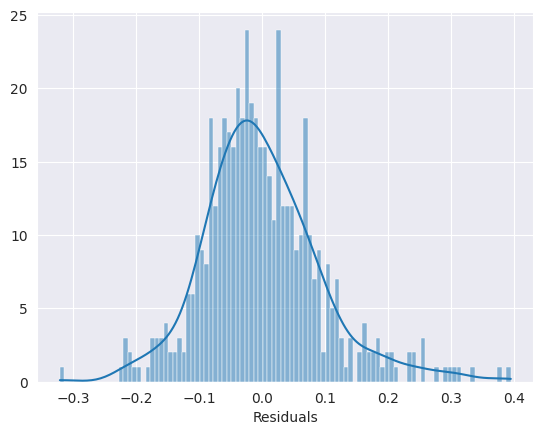

In [69]:
plt.figure()
sns.histplot((train_y_pred - train_y), bins=100, kde=True)
plt.xlabel('Residuals')
plt.ylabel('')
plt.title('')
plt.show()

We observe that residuals are centered at $0$ and are normally distributed. 

## Predictions and Evaluation on Test Data

In [72]:
test_X_rfe = sm.add_constant(test_X[[i for i in train_X_rfe.columns if i != 'const']])
test_X_rfe.head()

,const,yr,holiday,atemp,hum,windspeed,season_2,season_4,mnth_9,weathersit_3
196,1.0,0,0,0.741444,0.460557,0.415865,0,0,0,0
187,1.0,0,0,0.808256,0.552784,0.292782,0,0,0,0
14,1.0,0,0,0.205177,0.340487,0.289684,0,0,0,0
31,1.0,0,0,0.186509,0.801018,0.027323,0,0,0,0
390,1.0,1,0,0.353539,0.717517,0.077873,0,0,0,0


In [73]:
test_y_pred = lr_sm_model.predict(test_X_rfe)

In [ ]:
r2_score(test_y, test_y_pred)

In [ ]:
mean_squared_error(test_y, test_y_pred)

## Subjective Questions

### Question 1

| variable | $\beta_i$ value|
|--------------|:-----:|
|const|0.1962|
|yr|0.2161|
|holiday|-0.0603|
|workingday|0.0066|
|atemp|0.6006|
|hum|-0.2122|
|windspeed|-0.1281|
|season_2|0.0822|
|season_4|0.1287|
|mnth_9|0.1102|
|weathersit_3|-0.1475|

We can infer that:
- On windy days, the number of customers will be less
- Same can be said about a holiday
- On high humidity days the number of customers will be even less.
  with increare in temperature, the number of customers will increase


### Question 2
Using `drop_first=True` creates $k - 1$ dummy columns where $k$ is the number of categories. This allow us to use less columns to repesent the same information. This can be thought of as following. Suppose we variable `sex` which has 2 values `M` and `F`. Now if the column `is_male` containing `0` and `1` can describe the variable completely, and we do not require `is_female` columns to capture the all the information of the `sex` column.

### Question 3
`temp` and `atemp` are the 2 highest correlated to the target variable

### Question 4

We can validate by checking the distribution of the residuals:
- The errors should be random
- The errors should be centered around 0

Also the VIF for all the selected variables is less than 10

### Question 5
The top-3 features that contibute significantly towards expalining the demand are:
1. `yr`
2. `atemp`
3. `season_4`